## ME228 - Hackathon              22b2429

### Part a.<br>
In this question, we want to obtain the governing ordinary differential equation for the evolution of population of two creatures.<br> Let their populations be x1 and x2 , then what we desire to find is the following:<br>
dx1/dt = f(x1, x2, x1^2, x2^2, $x1*x2$) and<br>
dx2/dt = g(x1, x2, x1^2, x2^2, $x1*x2$)<br>
What we are given is the values of x1 and x2, ie the respective population of leoplanet and paldore at time intervals of 0.1.<br> 
The scatter plots of their respective population are generated using the below block of code:

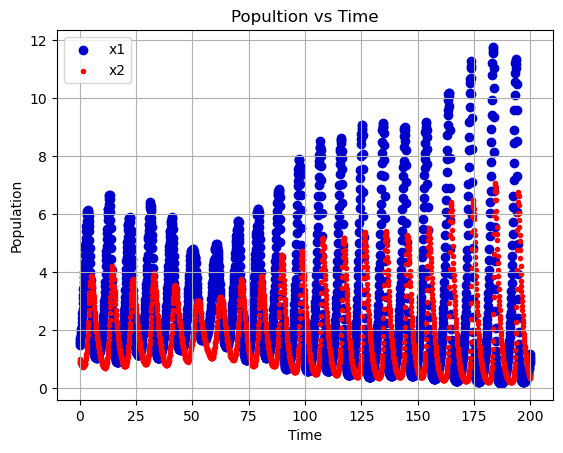

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

pop = pd.read_csv("29.csv")
time=[]
for x in range(len(pop['x1'].tolist())):
    time.append(x/10)
# 
plt.scatter(time, pop['x1'],color='mediumblue', label='x1')
plt.scatter(time, pop['x2'],marker='.',color='red', label='x2')
plt.title("Popultion vs Time")
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

### Part b : <br>
Now, We will be using Multiple Linear Regression to find the governing ODE in both the cases.<br>
So basically, our Hypothesis Set will be as follows :<br>
dx1/dt = $a*x1 + b*x2+ c*x1^2 + d*x2^2 + e*x1*x2 + f$  where (a,b,c,d,e,f) belong to Real No<br>
and<br>
dx2/dt = $u*x1 +v*x2+ w*x1^2 + x*x2^2 + y*x1*x2 + z $, where (u,v,w,x,y,z) belong to Real No <br> 
So, basically what we will do intially is add new columns to our dataframe including those of the<br>
derivatives and the non linear terms.<br>
Then We will split the data into train and test data sets (thrice using forward chaining as explained in the next blck in detail).<br>
After this, in each of the train data, We will train my MLR model, once for x1_derivative and secondly for x2_derivative and carry out Feature Redn using p values.( p value elimination explained in next blck in detail)<br>
Now , We will asscess the performance of my model on the testing data by checking the Mse and also the curves of predicted vs actual values. <br> 
We will then obtain the governing ODEs for both creatures using the co-efficients given by our model.


### Part c. Pseudo Code: <br>
1.Import csv file <br>
2.plot the data to check for any noise( minimal in this check by manual inspection)<br>
3.now add new columns to this datset which contains the derivatives of x1 and x2 wrt time using central difference method<br>
And also add the non linear terms upto the second degree.<br>
4.Now split the data into train and test sets thrice using forward chaining.<br>
Forward chaining while splitting basically makes sure of the fact  That more accurately models the situation you’ll<br>
see at prediction time, where you’ll model on past data and predict on forward-looking data. It also will give you <br>
a sense of the dependence of your modeling on data size.<br>
Hence , These are 3 splits : <br>
First 40 perecnt train ,40-60 percent test<br>
Then  First 60 percent train ,60-80 percent test<br>
Then  First 80 percent train ,80-100 percent test<br>
5.Now in each of these splits, use the train data to model the ODE Using MLR  <br>
applied twice, once to fit dx1/dt and then to fit dx2/dt.<br>
6.Now look at the p values of your co-efficients as given by the model, and eliminate those features one by one whose<br>
p values is more than 0.05 as they have almost no relationship with the output label.<br>
7.Now looking at the R_2 , gauge the performance of your model in sample.<br>
8.Using this model get the prediced label on the test data<br>
and gauge your model performance out of sample by lokking at the curves of y_predicted vs y_actual <br>
wrt each of the features and aso observe the MSE values.<br>
9.Now repeat this thrice for each of the splits.<br>

The code which starts from here basically does the work starting from Step 3 to step 9 as mentioned above.

In [70]:
t = 0.1

#  TODO - Calculate derivatives for x1 and x2 (excluding first and last rows)
lisx1=pop['x1'].tolist()
lisx2=pop['x2'].tolist()
lisdx1=[0 for x in lisx1]
lisdx2=[0 for x in lisx2]
for i in range(1,len(lisx1)-1):
    lisdx1[i]=(lisx1[i+1]-lisx1[i-1])/0.2
    lisdx2[i]=(lisx2[i+1]-lisx2[i-1])/0.2

pop['dx1']=lisdx1
pop['dx2']=lisdx2
pop['x1_squared'] = pop['x1'] ** 2
pop['x2_squared'] = pop['x2'] ** 2
pop['x1_times_x2'] = pop['x1'] * pop['x2']

pop.to_csv("29.csv", index=False)

print(pop.head())

         x1        x2  x1_squared  x2_squared  x1_times_x2       dx1       dx2
0  1.505066  1.001880    2.265225    1.003764     1.507897  0.000000  0.000000
1  1.569910  0.948006    2.464616    0.898716     1.488284  0.524076 -0.373664
2  1.609882  0.927147    2.591719    0.859602     1.492598  0.522625 -0.201146
3  1.674435  0.907777    2.803732    0.824060     1.520014  0.605508 -0.244769
4  1.730983  0.878194    2.996303    0.771224     1.520139  0.677403 -0.190437


The following two blocks of code are for the Fisrt Split as illustrated in the pseudo code abive.
Written soln of part d is at the end, once all the splits are completed.

## Part d and e.

### Split 1 : $dx1/dt $ (Leopanet) :

Coefficients:
const          0.112602
x1             0.688620
x2             0.049579
x1_squared     0.002106
x2_squared    -0.040505
x1_times_x2   -0.366603
dtype: float64

P-values:
const          0.3891
x1             0.0000
x2             0.5602
x1_squared     0.7496
x2_squared     0.0266
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9445176639068287

Mean Squared Error: 0.12969082824471637


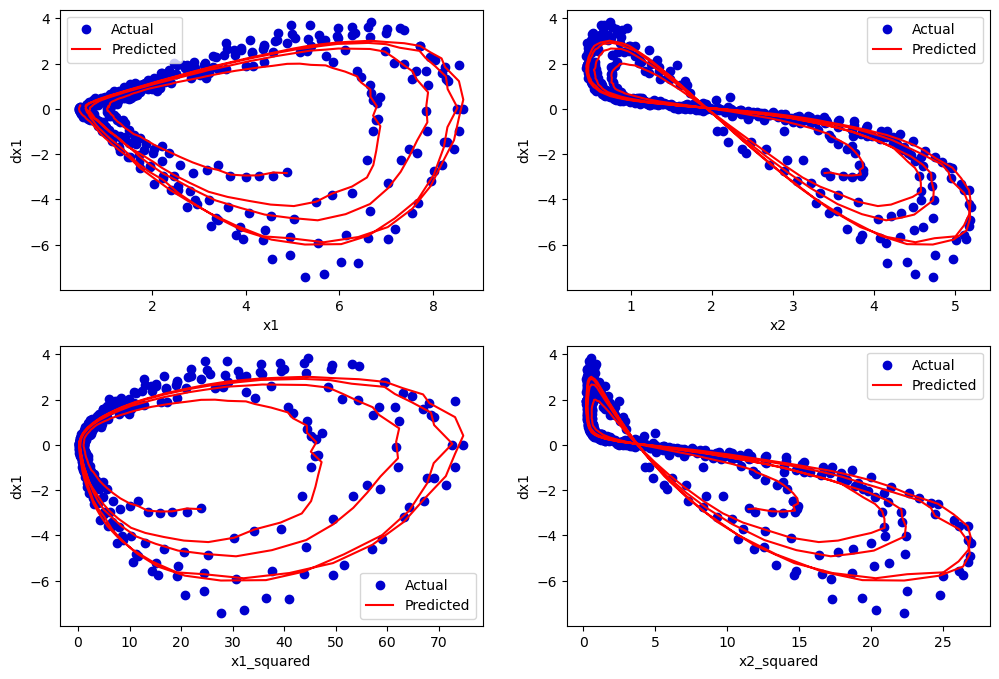

In [71]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.4)
validation_end_index = int(total_rows * 0.6)

train_data = pop[:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# TODO START

# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']] 
y_train = train_data['dx1']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]  
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plot for x1 vs dx1 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred,color='red',label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx1')
axes[0, 0].legend()

# Plot for x2 vs dx1 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx1')
axes[0, 1].legend()

# Plot for x1_squared vs dx1 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred,color='red', label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx1')
axes[1, 0].legend()

# Plot for x2_squared vs dx1 (actual vs predicted)
axes[1, 1].scatter(validation_data['x2_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x2_squared'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x2_squared')
axes[1, 1].set_ylabel('dx1')
axes[1, 1].legend()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx1']) ** 2)
print("\nMean Squared Error:", mse)


# TODO END

### Split 1 : $dx2/dt $ (Paldore) :

Coefficients:
const          0.080224
x1            -0.099348
x2            -0.577766
x1_squared     0.016255
x2_squared    -0.011039
x1_times_x2    0.215595
dtype: float64

P-values:
const          0.2810
x1             0.0003
x2             0.0000
x1_squared     0.0000
x2_squared     0.2878
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9493596496694813

Mean Squared Error: 0.032708459710699946


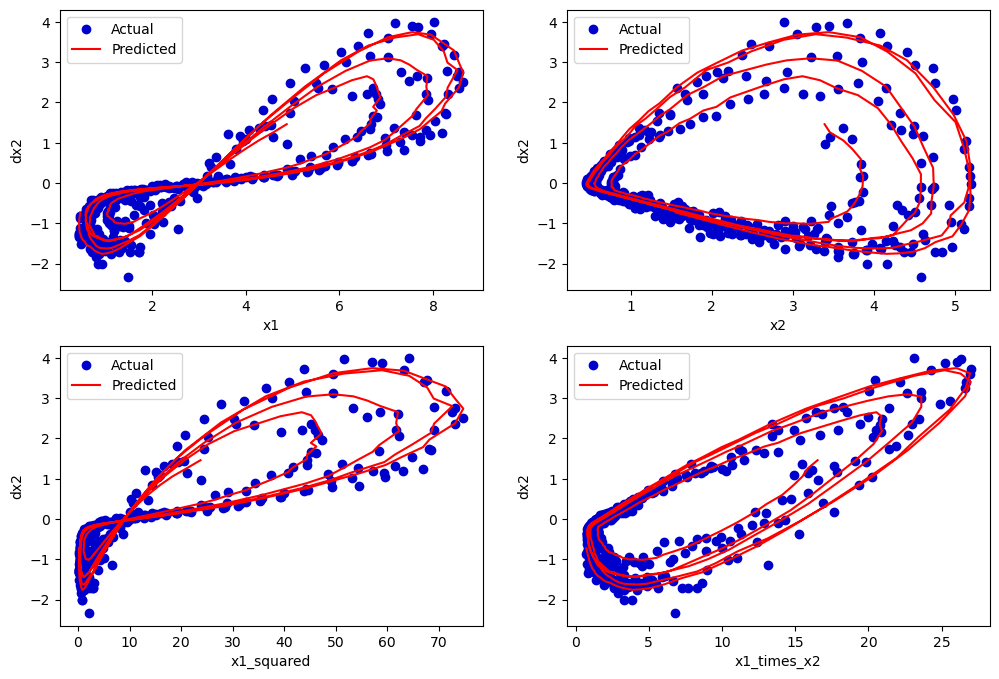

In [72]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.4)
validation_end_index = int(total_rows * 0.6)

train_data = pop[:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
y_train = train_data['dx2']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plot for x1 vs dx2 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx2'],color='mediumblue', label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred,color='red', label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx2')
axes[0, 0].legend()

# Plot for x2 vs dx2 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx2'],color='mediumblue', label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx2')
axes[0, 1].legend()

# Plot for x1_squared vs dx2 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx2'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred,color='red', label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx2')
axes[1, 0].legend()

# Plot for x1_times_x2 vs dx2 (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'], validation_data['dx2'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x1_times_x2'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x1_times_x2')
axes[1, 1].set_ylabel('dx2')
axes[1, 1].legend()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx2']) ** 2)
print("\nMean Squared Error:", mse)

plt.show()

### Split 2 : $dx1/dt $ (Leopanet) :

Coefficients:
const         -0.090670
x1             0.791410
x2             0.157339
x1_squared     0.000860
x2_squared    -0.046267
x1_times_x2   -0.409795
dtype: float64

P-values:
const          0.1308
x1             0.0000
x2             0.0001
x1_squared     0.7389
x2_squared     0.0000
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9649728638533256


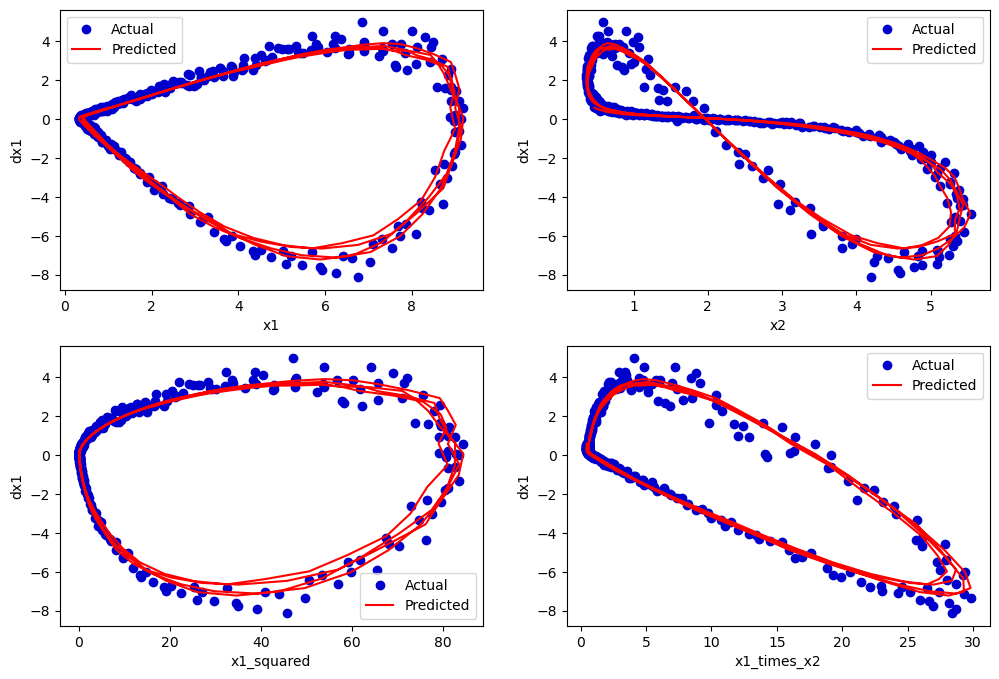


Mean Squared Error: 0.105805017181356


In [73]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.6)
validation_end_index = int(total_rows * 0.8)

train_data = pop[:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
y_train = train_data['dx1']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Plot for x1 vs dx1 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx1'], color='mediumblue',label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred,color='red', label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx1')
axes[0, 0].legend()

# Plot for x2 vs dx1 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx1'], color='mediumblue',label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx1')
axes[0, 1].legend()

# Plot for x1_squared vs dx1 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred,color='red', label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx1')
axes[1, 0].legend()

# Plot for x1_times_x2 vs dx1 (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x1_times_x2'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x1_times_x2')
axes[1, 1].set_ylabel('dx1')
axes[1, 1].legend()

plt.show()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx1']) ** 2)
print("\nMean Squared Error:", mse)

### Split 2 : $dx2/dt $ (Paldore) :

Coefficients:
const         -0.090670
x1             0.791410
x2             0.157339
x1_squared     0.000860
x2_squared    -0.046267
x1_times_x2   -0.409795
dtype: float64

P-values:
const          0.1308
x1             0.0000
x2             0.0001
x1_squared     0.7389
x2_squared     0.0000
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9649728638533256


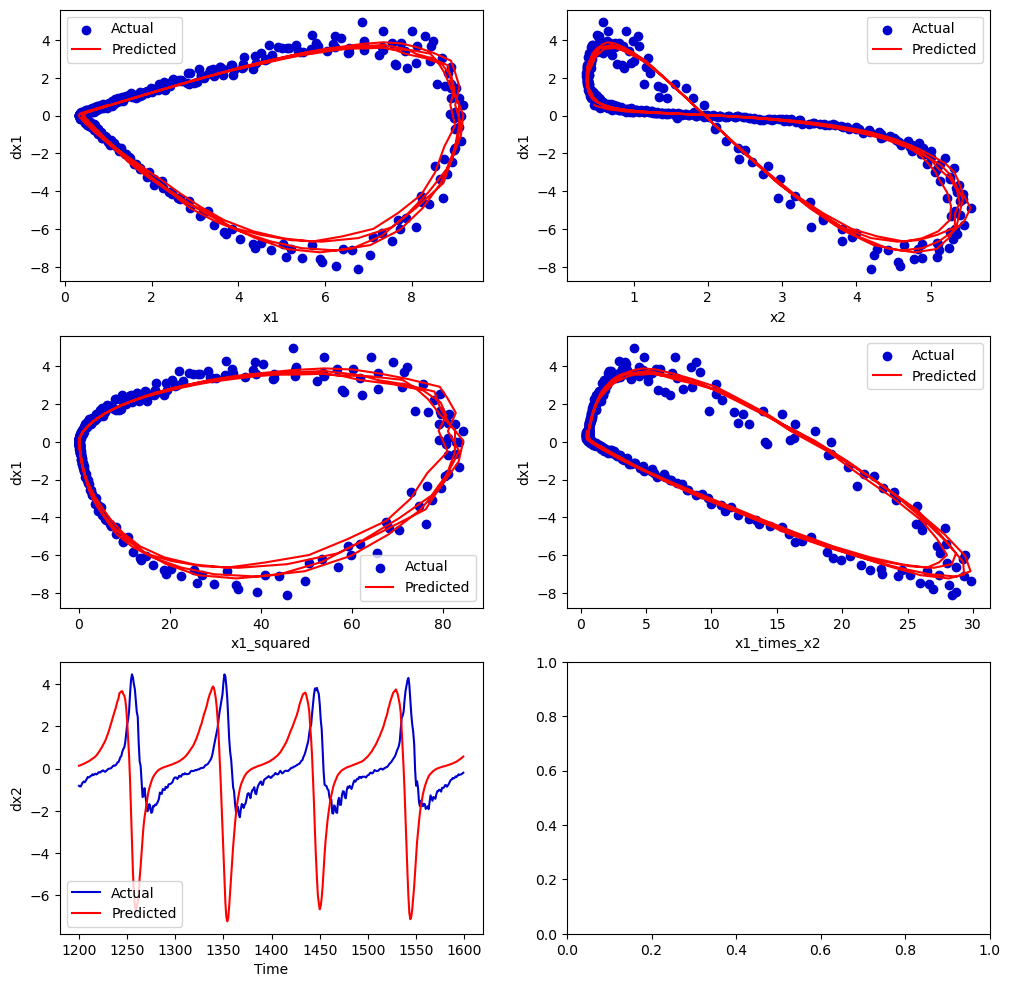


Mean Squared Error: 0.105805017181356


In [74]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.6)
validation_end_index = int(total_rows * 0.8)

train_data = pop[:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']] 
y_train = train_data['dx1']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# Plot for x1 vs dx1 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred,color='red', label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx1')
axes[0, 0].legend()

# Plot for x2 vs dx1 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx1')
axes[0, 1].legend()

# Plot for x1_squared vs dx1 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred,color='red', label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx1')
axes[1, 0].legend()

# Plot for x1_times_x2 vs dx1 (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x1_times_x2'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x1_times_x2')
axes[1, 1].set_ylabel('dx1')
axes[1, 1].legend()

# Plot time evolution of dx2 (actual vs predicted)
axes[2, 0].plot(validation_data.index, validation_data['dx2'],color='mediumblue', label='Actual')
axes[2, 0].plot(validation_data.index, y_pred,color='red', label='Predicted')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('dx2')
axes[2, 0].legend()

plt.show()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx1']) ** 2)
print("\nMean Squared Error:", mse)

### Split 3 : $dx1/dt $ (Leopanet) :

Coefficients:
const         -0.090670
x1             0.791410
x2             0.157339
x1_squared     0.000860
x2_squared    -0.046267
x1_times_x2   -0.409795
dtype: float64

P-values:
const          0.1308
x1             0.0000
x2             0.0001
x1_squared     0.7389
x2_squared     0.0000
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9649728638533256


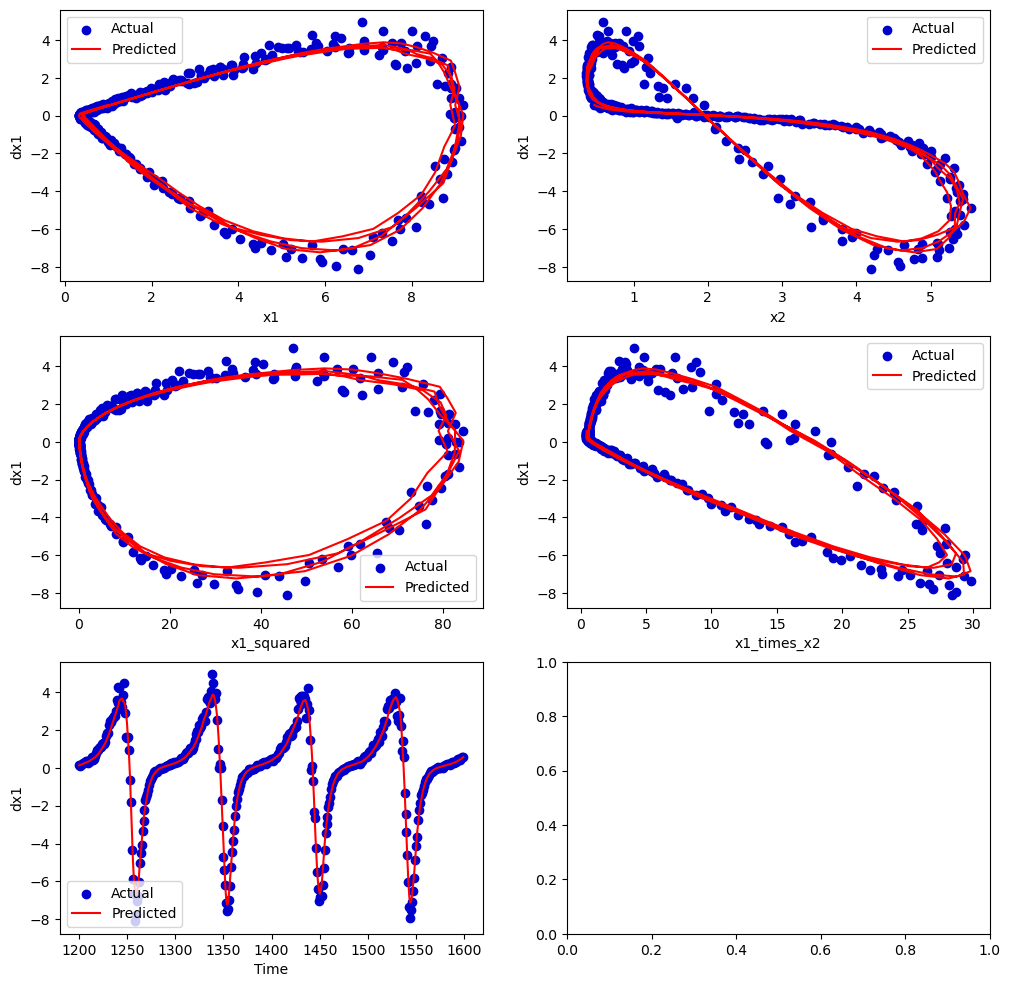


Mean Squared Error: 0.105805017181356


In [75]:
# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared','x2_squared', 'x1_times_x2']]
y_train = train_data['dx1']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']] 
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# Plot for x1 vs dx1 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred,color='red', label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx1')
axes[0, 0].legend()

# Plot for x2 vs dx1 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx1')
axes[0, 1].legend()

# Plot for x1_squared vs dx1 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred,color='red', label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx1')
axes[1, 0].legend()

# Plot for x1_times_x2 vs dx1 (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x1_times_x2'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x1_times_x2')
axes[1, 1].set_ylabel('dx1')
axes[1, 1].legend()

# Plot time evolution of dx1 (actual vs predicted)
axes[2, 0].scatter(validation_data.index, validation_data['dx1'],color='mediumblue', label='Actual')
axes[2, 0].plot(validation_data.index, y_pred,color='red', label='Predicted')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('dx1')
axes[2, 0].legend()

plt.show()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx1']) ** 2)
print("\nMean Squared Error:", mse)

### Split 3 : $dx2/dt $ (Paldore) :

Coefficients:
const         -0.124719
x1             0.841818
x2             0.168044
x1_squared    -0.003686
x2_squared    -0.045446
x1_times_x2   -0.423215
dtype: float64

P-values:
const          0.0016
x1             0.0000
x2             0.0000
x1_squared     0.0240
x2_squared     0.0000
x1_times_x2    0.0000
dtype: float64

R-squared:
0.9745010639932686


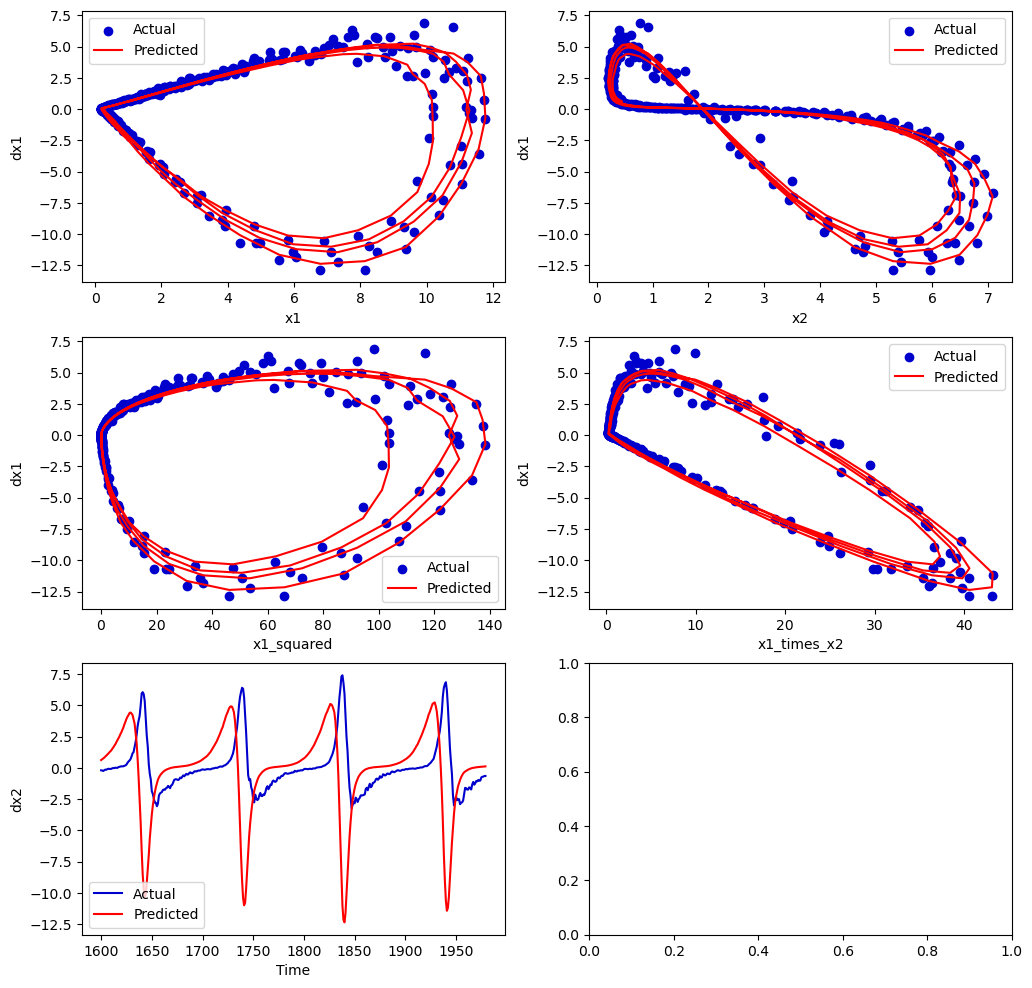


Mean Squared Error: 0.15637292103008754


In [76]:
total_rows = len(pop)
train_end_index = int(total_rows * 0.8)
validation_end_index = int(total_rows * 0.99)

train_data = pop[:train_end_index]
validation_data = pop[train_end_index:validation_end_index]

# Define features (X) and target variable (y)
X_train = train_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']] 
y_train = train_data['dx1']

# Add a constant to the features (for intercept term in MLR)
X_train = sm.add_constant(X_train)

# Apply Multiple Linear Regression
model = sm.OLS(y_train, X_train)
results = model.fit()

# Get coefficients, p-values, and R-squared
coefficients = results.params
p_values = results.pvalues
R_squared = results.rsquared

print("Coefficients:")
print(coefficients)
print("\nP-values:")
print(round(p_values,4))
print("\nR-squared:")
print(R_squared)

# Predicted values using coefficients
X_validation = validation_data[['x1', 'x2', 'x1_squared', 'x2_squared', 'x1_times_x2']]
X_validation = sm.add_constant(X_validation)
y_pred = results.predict(X_validation)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# Plot for x1 vs dx1 (actual vs predicted)
axes[0, 0].scatter(validation_data['x1'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 0].plot(validation_data['x1'], y_pred, color='red',label='Predicted')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('dx1')
axes[0, 0].legend()

# Plot for x2 vs dx1 (actual vs predicted)
axes[0, 1].scatter(validation_data['x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[0, 1].plot(validation_data['x2'], y_pred,color='red', label='Predicted')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('dx1')
axes[0, 1].legend()

# Plot for x1_squared vs dx1 (actual vs predicted)
axes[1, 0].scatter(validation_data['x1_squared'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 0].plot(validation_data['x1_squared'], y_pred, color='red',label='Predicted')
axes[1, 0].set_xlabel('x1_squared')
axes[1, 0].set_ylabel('dx1')
axes[1, 0].legend()

# Plot for x1_times_x2 vs dx1 (actual vs predicted)
axes[1, 1].scatter(validation_data['x1_times_x2'], validation_data['dx1'],color='mediumblue', label='Actual')
axes[1, 1].plot(validation_data['x1_times_x2'], y_pred,color='red', label='Predicted')
axes[1, 1].set_xlabel('x1_times_x2')
axes[1, 1].set_ylabel('dx1')
axes[1, 1].legend()

# Plot the time evolution of dx2 (actual vs predicted)
axes[2, 0].plot(validation_data.index, validation_data['dx2'],color='mediumblue', label='Actual')
axes[2, 0].plot(validation_data.index, y_pred,color='red', label='Predicted')
axes[2, 0].set_xlabel('Time')
axes[2, 0].set_ylabel('dx2')
axes[2, 0].legend()

plt.show()

# Calculate Mean Squared Error in test data
mse = np.mean((y_pred - validation_data['dx1']) ** 2)
print("\nMean Squared Error:", mse)

## Part d : ( Written Note) 
The following are my final hypothesis for the rate of change of two creature populations as given by my model: <br>
TODO

Now we can neglect those terms which have very small co-efficient as they won't impact the output much<br>
Hence, refined hypothesis:<br>
TODO

### Part e : (Written Note) <br>
TODO

## Thank You !!